# Import Tiny Yolo from ONNX with DLPy

In this example, we will import an ONNX Tiny YOLO V2 Model using DLPy.  
This model can be found on the ONNX model zoo: https://github.com/onnx/models

The model originates from Darknet's Tiny YOLO https://pjreddie.com/darknet/yolov2/, which was converted to ONNX.
For more information, check out the github repo.

In [1]:
import swat
import dlpy
from dlpy import ImageTable, Model
from dlpy.model import Gpu
from dlpy.layers import *
from dlpy.utils import *
import onnx
import warnings
warnings.filterwarnings('ignore') # Ignore all the warning messages in this tutorial

### Connect to CAS

In [2]:
s = swat.CAS(cashost, casport)

### Load ONNX YOLO Model

In [3]:
onnx_model = onnx.load('/disk/linux/dlpy/tiny_yolov2/model.onnx')

### Specify YOLO Anchors and DLPy Detection Layer

In [4]:
yolo_anchors = (1.08,1.19,  3.42,4.41,  6.63,11.38,  9.42,5.11,  16.62,10.52)

output_layer = Detection(name='Detection1',
                         detection_model_type='yolov2', 
                         anchors=yolo_anchors, 
                         predictions_per_grid=5, 
                         class_number=20,
                         softmax_for_class_prob=True,
                         object_scale=5.0,
                         prediction_not_a_object_scale=1.0,
                         class_scale=1.0,
                         coord_scale=1.0,
                         act='LOGISTIC',
                         grid_number=13,
                         coord_type='YOLO',
                         detection_threshold=0.3,
                         iou_threshold=0.3)

### Convert ONNX Model to DLPy Model, and Generate H5 Weights File

In [5]:
model1 = Model.from_onnx_model(conn=s, 
                               onnx_model=onnx_model,
                               output_model_table='tiny_yolov2',
                               scale=1/255.,
                               output_layer=output_layer)

NOTE: Successfully written weights file as /root/working/tiny_yolov2_weights.onnxmodel.h5
NOTE: Model table is attached successfully!
NOTE: Model is named to "tiny_yolov2" according to the model name in the table.
NOTE: Successfully imported ONNX model.


In [6]:
model1.print_summary()

,Layer,Type,Kernel Size,Stride,Activation,Output Size,Number of Parameters
0,image,input,None,NaN,None,"(416, 416, 3)","(0, 0)"
1,convolution,convo,"(3, 3)",1,Identity,"(416, 416, 16)","(432, 0)"
2,batchnorm,batchnorm,None,NaN,Leaky,"(416, 416, 16)","(0, 32)"
3,pooling,pool,"(2, 2)",2,Max,"(208, 208, 16)","(0, 0)"
4,convolution1,convo,"(3, 3)",1,Identity,"(208, 208, 32)","(4608, 0)"
5,batchnorm1,batchnorm,None,NaN,Leaky,"(208, 208, 32)","(0, 64)"
6,pooling1,pool,"(2, 2)",2,Max,"(104, 104, 32)","(0, 0)"
7,convolution2,convo,"(3, 3)",1,Identity,"(104, 104, 64)","(18432, 0)"
8,batchnorm2,batchnorm,None,NaN,Leaky,"(104, 104, 64)","(0, 128)"
9,pooling2,pool,"(2, 2)",2,Max,"(52, 52, 64)","(0, 0)"


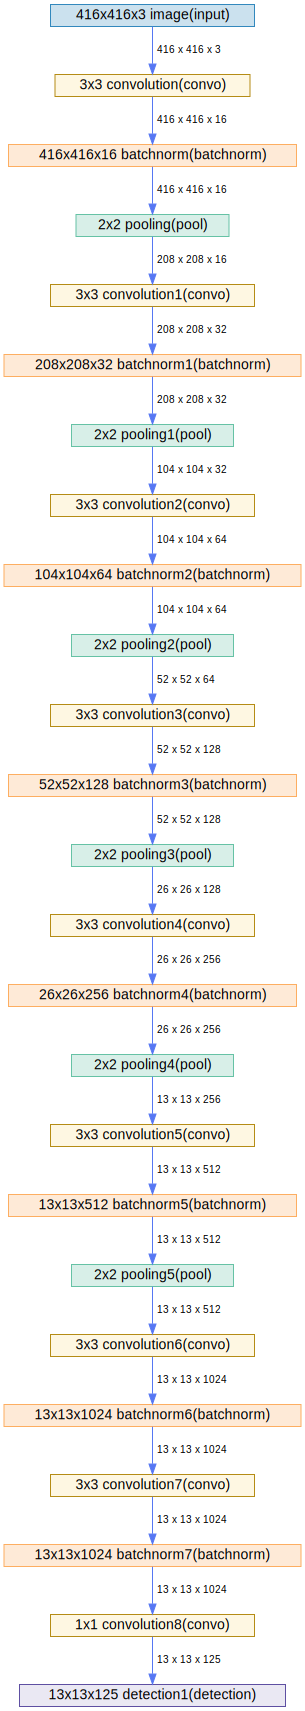

In [7]:
model1.plot_network()

### Load H5 Weights File

In [8]:
model1.load_weights('/disk/linux/dlpy/tiny_yolov2_weights.onnxmodel.h5')

NOTE: Model weights attached successfully!


### Load VOC Test Images

In [9]:
img = ImageTable.load_files(s, path='/disk/linux/dlpy/VOC')

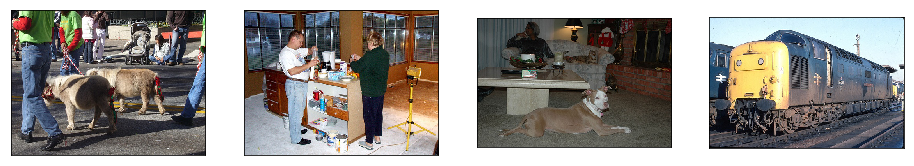

In [10]:
img.show(randomize=True, nimages=4)

In [11]:
img.image_summary

jpg                  4952
minWidth              148
maxWidth              500
minHeight             139
maxHeight             500
meanWidth         471.247
meanHeight        381.538
mean1stChannel    99.8842
min1stChannel           0
max1stChannel         255
mean2ndChannel    108.463
min2ndChannel           0
max2ndChannel         255
mean3rdChannel    114.346
min3rdChannel           0
max3rdChannel         255
dtype: object

Resize to 416x416

In [12]:
img.resize(416)

## Score VOC Test Images

Update Attributes For dlscore Action

In [13]:
# first we need to supply some attributes for the dlscore action
# attributes can be converted and saved from an existing SAS model
s.addcaslib('data', path='/disk/linux/data', activeonadd=False, subdirectories=False)
s.loadtable(path='yoloweightsAttr.sashdat', caslib='data', casout=dict(name='yoloweightsAttr', replace=True))

# Update attributes for weights
s.table.attribute(task='UPDATE', name=model1.model_weights.name, attrtable='yoloweightsAttr')

NOTE: Cloud Analytic Services added the caslib 'data'.
NOTE: Cloud Analytic Services made the file yoloweightsAttr.sashdat available as table YOLOWEIGHTSATTR in caslib CASUSER(sas).


+ Elapsed: 0.000337s, mem: 0.339mb

Score with GPU

In [14]:
model1.predict(img, gpu = Gpu(devices=[0]))

NOTE: Only 1 out of 4 available GPU devices are used.


[ScoreInfo]

                          Descr         Value
 0  Number of Observations Read          4952
 1  Number of Observations Used             0

[OutputCasTables]

          casLib              Name  Rows  Columns  \
 0  CASUSER(sas)  Valid_Res_ytubvl  4939     5075   
 
                                             casTable  
 0  CASTable('Valid_Res_ytubvl', caslib='CASUSER(s...  

+ Elapsed: 10.9s, user: 60.2s, sys: 4.94s, mem: 1.35e+03mb

### Display Scoring Results

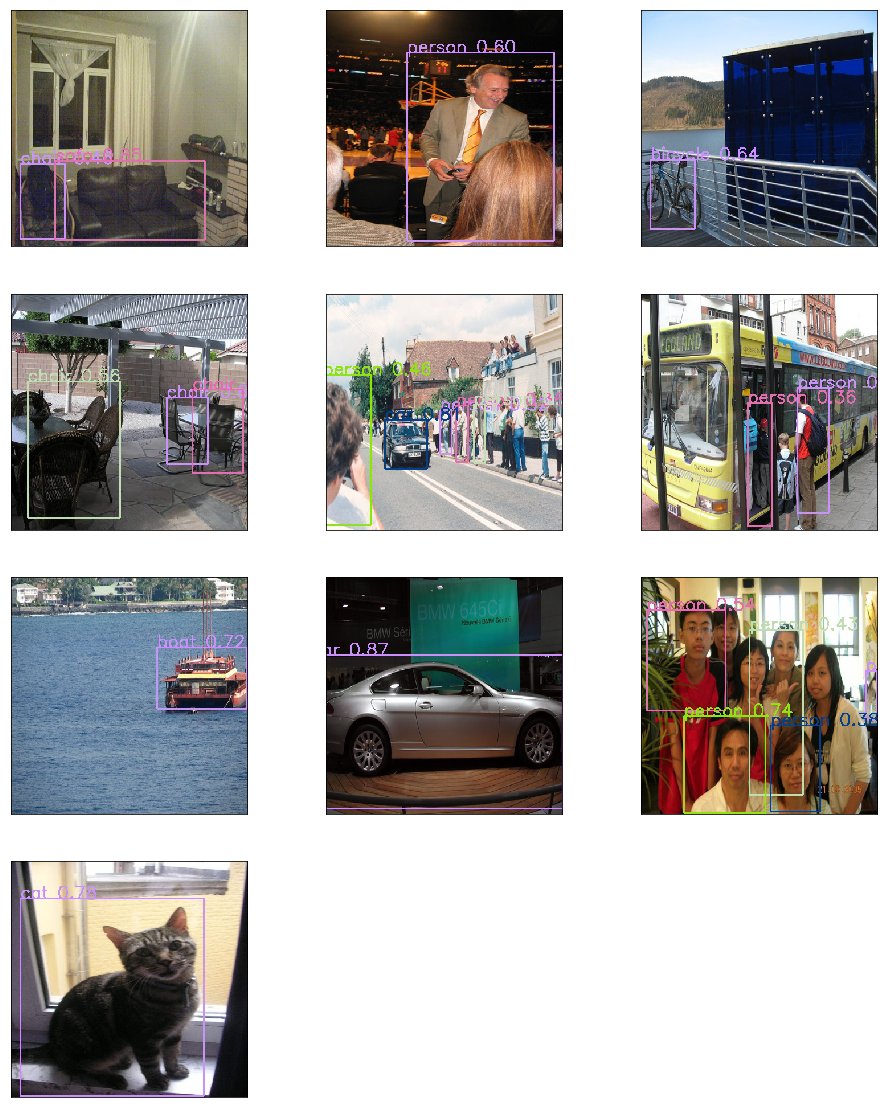

In [15]:
display_object_detections(conn=s, 
                          coord_type='yolo', 
                          max_objects=5, 
                          table=model1.valid_res_tbl, 
                          num_plot=10,
                          n_col=3)

# Model Deployment

Deployment options:  
1. ASTORE  
2. ONNX  
3. Model weights  

In [16]:
# save model as Astore, e.g. for deploying in SAS Event Stream Processing
model1.deploy(path='/disk/linux/data', output_format='astore')

NOTE: Model astore file saved successfully.


In [17]:
s.endsession()

+ Elapsed: 0.000239s, mem: 0.195mb